# 📘 TP : Implémentation de LeNet-5 pour la classification Tifinagh
Ce notebook implémente pas à pas le réseau LeNet-5 modifié pour reconnaître 33 caractères de l'alphabet Tifinagh.

In [6]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

In [7]:
# Définition du modèle LeNet-5
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.AvgPool2d(2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 33)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
# Préparation des données
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

dataset = ImageFolder(root=r'C:\Users\ADMIN_SB\Desktop\master IAA\S2\Deep Learning\TP7\images-data-64\tifinagh-images', transform=transform)
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_set, batch_size=32, shuffle=False)

In [11]:
# Fonctions d'entraînement et d'évaluation
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss, correct = 0, 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (outputs.argmax(1) == y).sum().item()
    return total_loss / len(loader), correct / len(loader.dataset)

def evaluate(model, loader, criterion):
    model.eval()
    total_loss, correct = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = criterion(outputs, y)
            total_loss += loss.item()
            correct += (outputs.argmax(1) == y).sum().item()
    return total_loss / len(loader), correct / len(loader.dataset)

In [12]:
# Boucle d'apprentissage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epochs = 20
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Époch {epoch+1}: Train Acc = {train_acc:.2%}, Val Acc = {val_acc:.2%}")

Époch 1: Train Acc = 44.20%, Val Acc = 65.05%
Époch 2: Train Acc = 72.53%, Val Acc = 77.71%
Époch 3: Train Acc = 81.54%, Val Acc = 82.93%
Époch 4: Train Acc = 86.79%, Val Acc = 84.81%
Époch 5: Train Acc = 89.80%, Val Acc = 89.21%
Époch 6: Train Acc = 91.20%, Val Acc = 91.02%
Époch 7: Train Acc = 92.71%, Val Acc = 92.58%
Époch 8: Train Acc = 94.04%, Val Acc = 92.23%
Époch 9: Train Acc = 94.89%, Val Acc = 92.97%
Époch 10: Train Acc = 95.30%, Val Acc = 94.11%
Époch 11: Train Acc = 95.68%, Val Acc = 94.46%
Époch 12: Train Acc = 96.07%, Val Acc = 94.82%
Époch 13: Train Acc = 96.54%, Val Acc = 95.88%
Époch 14: Train Acc = 97.02%, Val Acc = 95.49%
Époch 15: Train Acc = 96.96%, Val Acc = 94.25%
Époch 16: Train Acc = 97.34%, Val Acc = 95.88%
Époch 17: Train Acc = 97.70%, Val Acc = 96.45%
Époch 18: Train Acc = 97.43%, Val Acc = 96.31%
Époch 19: Train Acc = 97.98%, Val Acc = 96.84%
Époch 20: Train Acc = 98.06%, Val Acc = 96.56%


In [27]:
# Boucle d'apprentissage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epochs = 20
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, test_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Époch {epoch+1}: Train Acc = {train_acc:.2%}, Val Acc = {val_acc:.2%}")

Époch 1: Train Acc = 41.05%, Val Acc = 63.75%
Époch 2: Train Acc = 71.40%, Val Acc = 77.97%
Époch 3: Train Acc = 80.63%, Val Acc = 81.66%
Époch 4: Train Acc = 85.76%, Val Acc = 86.73%
Époch 5: Train Acc = 88.53%, Val Acc = 87.16%
Époch 6: Train Acc = 90.30%, Val Acc = 89.07%
Époch 7: Train Acc = 91.88%, Val Acc = 91.31%
Époch 8: Train Acc = 92.97%, Val Acc = 91.31%
Époch 9: Train Acc = 94.07%, Val Acc = 93.26%
Époch 10: Train Acc = 94.70%, Val Acc = 93.05%
Époch 11: Train Acc = 95.31%, Val Acc = 92.83%
Époch 12: Train Acc = 95.83%, Val Acc = 93.33%
Époch 13: Train Acc = 96.04%, Val Acc = 93.97%
Époch 14: Train Acc = 96.83%, Val Acc = 94.43%
Époch 15: Train Acc = 96.75%, Val Acc = 94.11%
Époch 16: Train Acc = 96.86%, Val Acc = 94.82%
Époch 17: Train Acc = 97.48%, Val Acc = 94.47%
Époch 18: Train Acc = 97.62%, Val Acc = 94.47%
Époch 19: Train Acc = 97.58%, Val Acc = 96.03%
Époch 20: Train Acc = 97.80%, Val Acc = 95.89%


In [18]:
# Boucle d'apprentissage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.002)
criterion = nn.CrossEntropyLoss()

epochs = 20
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Époch {epoch+1}: Train Acc = {train_acc:.2%}, Val Acc = {val_acc:.2%}")

Époch 1: Train Acc = 51.89%, Val Acc = 74.98%
Époch 2: Train Acc = 81.00%, Val Acc = 85.63%
Époch 3: Train Acc = 88.98%, Val Acc = 87.83%
Époch 4: Train Acc = 92.01%, Val Acc = 92.94%
Époch 5: Train Acc = 93.58%, Val Acc = 93.75%
Époch 6: Train Acc = 94.45%, Val Acc = 94.18%
Époch 7: Train Acc = 95.75%, Val Acc = 95.71%
Époch 8: Train Acc = 96.28%, Val Acc = 95.10%
Époch 9: Train Acc = 96.75%, Val Acc = 94.39%
Époch 10: Train Acc = 96.91%, Val Acc = 95.35%
Époch 11: Train Acc = 97.25%, Val Acc = 92.94%
Époch 12: Train Acc = 97.50%, Val Acc = 96.45%
Époch 13: Train Acc = 97.67%, Val Acc = 96.45%
Époch 14: Train Acc = 97.68%, Val Acc = 95.95%
Époch 15: Train Acc = 98.22%, Val Acc = 97.41%
Époch 16: Train Acc = 98.03%, Val Acc = 96.52%
Époch 17: Train Acc = 98.21%, Val Acc = 96.13%
Époch 18: Train Acc = 98.29%, Val Acc = 96.27%
Époch 19: Train Acc = 98.52%, Val Acc = 96.56%
Époch 20: Train Acc = 98.39%, Val Acc = 97.27%


In [20]:
# Boucle d'apprentissage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0024)
criterion = nn.CrossEntropyLoss()

epochs = 20
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Époch {epoch+1}: Train Acc = {train_acc:.2%}, Val Acc = {val_acc:.2%}")

Époch 1: Train Acc = 54.82%, Val Acc = 72.68%
Époch 2: Train Acc = 81.56%, Val Acc = 84.21%
Époch 3: Train Acc = 88.41%, Val Acc = 88.04%
Époch 4: Train Acc = 91.23%, Val Acc = 91.77%
Époch 5: Train Acc = 93.01%, Val Acc = 92.69%
Époch 6: Train Acc = 94.57%, Val Acc = 93.75%
Époch 7: Train Acc = 94.95%, Val Acc = 93.75%
Époch 8: Train Acc = 95.44%, Val Acc = 92.41%
Époch 9: Train Acc = 96.05%, Val Acc = 93.29%
Époch 10: Train Acc = 96.37%, Val Acc = 95.14%
Époch 11: Train Acc = 96.76%, Val Acc = 95.78%
Époch 12: Train Acc = 97.32%, Val Acc = 94.36%
Époch 13: Train Acc = 97.09%, Val Acc = 96.27%
Époch 14: Train Acc = 97.70%, Val Acc = 94.82%
Époch 15: Train Acc = 97.36%, Val Acc = 95.99%
Époch 16: Train Acc = 97.99%, Val Acc = 96.84%
Époch 17: Train Acc = 97.80%, Val Acc = 95.95%
Époch 18: Train Acc = 97.65%, Val Acc = 96.42%
Époch 19: Train Acc = 98.15%, Val Acc = 97.02%
Époch 20: Train Acc = 98.34%, Val Acc = 95.92%


In [19]:
# Boucle d'apprentissage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss()

epochs = 20
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Époch {epoch+1}: Train Acc = {train_acc:.2%}, Val Acc = {val_acc:.2%}")

Époch 1: Train Acc = 56.54%, Val Acc = 79.63%
Époch 2: Train Acc = 84.95%, Val Acc = 87.30%
Époch 3: Train Acc = 91.10%, Val Acc = 90.28%
Époch 4: Train Acc = 93.64%, Val Acc = 92.16%
Époch 5: Train Acc = 94.69%, Val Acc = 94.29%
Époch 6: Train Acc = 95.57%, Val Acc = 95.32%
Époch 7: Train Acc = 96.19%, Val Acc = 94.29%
Époch 8: Train Acc = 96.82%, Val Acc = 95.64%
Époch 9: Train Acc = 96.89%, Val Acc = 96.13%
Époch 10: Train Acc = 97.21%, Val Acc = 92.19%
Époch 11: Train Acc = 97.33%, Val Acc = 96.70%
Époch 12: Train Acc = 97.43%, Val Acc = 95.99%
Époch 13: Train Acc = 97.68%, Val Acc = 94.14%
Époch 14: Train Acc = 97.71%, Val Acc = 95.53%
Époch 15: Train Acc = 98.31%, Val Acc = 97.09%
Époch 16: Train Acc = 98.19%, Val Acc = 96.70%
Époch 17: Train Acc = 97.88%, Val Acc = 96.66%
Époch 18: Train Acc = 98.34%, Val Acc = 95.56%
Époch 19: Train Acc = 98.47%, Val Acc = 96.49%
Époch 20: Train Acc = 98.31%, Val Acc = 96.84%


In [17]:
# Boucle d'apprentissage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.CrossEntropyLoss()

epochs = 20
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Époch {epoch+1}: Train Acc = {train_acc:.2%}, Val Acc = {val_acc:.2%}")

Époch 1: Train Acc = 39.42%, Val Acc = 58.69%
Époch 2: Train Acc = 66.00%, Val Acc = 73.42%
Époch 3: Train Acc = 75.59%, Val Acc = 76.44%
Époch 4: Train Acc = 81.26%, Val Acc = 81.97%
Époch 5: Train Acc = 85.68%, Val Acc = 85.59%
Époch 6: Train Acc = 88.22%, Val Acc = 86.52%
Époch 7: Train Acc = 90.57%, Val Acc = 90.35%
Époch 8: Train Acc = 91.81%, Val Acc = 90.49%
Époch 9: Train Acc = 92.63%, Val Acc = 90.42%
Époch 10: Train Acc = 93.65%, Val Acc = 92.58%
Époch 11: Train Acc = 94.52%, Val Acc = 92.51%
Époch 12: Train Acc = 95.00%, Val Acc = 92.23%
Époch 13: Train Acc = 95.59%, Val Acc = 95.21%
Époch 14: Train Acc = 95.88%, Val Acc = 94.43%
Époch 15: Train Acc = 96.12%, Val Acc = 93.54%
Époch 16: Train Acc = 96.51%, Val Acc = 95.21%
Époch 17: Train Acc = 96.94%, Val Acc = 95.14%
Époch 18: Train Acc = 96.88%, Val Acc = 95.00%
Époch 19: Train Acc = 97.21%, Val Acc = 94.25%
Époch 20: Train Acc = 97.35%, Val Acc = 94.50%


In [24]:
# Boucle d'apprentissage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
optimizer = optim.RMSprop(model.parameters(), lr=0.002)
criterion = nn.CrossEntropyLoss()

epochs = 20
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Époch {epoch+1}: Train Acc = {train_acc:.2%}, Val Acc = {val_acc:.2%}")

Époch 1: Train Acc = 53.27%, Val Acc = 72.96%
Époch 2: Train Acc = 80.84%, Val Acc = 82.86%
Époch 3: Train Acc = 88.25%, Val Acc = 85.49%
Époch 4: Train Acc = 91.59%, Val Acc = 91.34%
Époch 5: Train Acc = 93.50%, Val Acc = 93.08%
Époch 6: Train Acc = 94.85%, Val Acc = 90.24%
Époch 7: Train Acc = 95.86%, Val Acc = 94.75%
Époch 8: Train Acc = 96.29%, Val Acc = 93.33%
Époch 9: Train Acc = 96.90%, Val Acc = 96.20%
Époch 10: Train Acc = 97.17%, Val Acc = 92.58%
Époch 11: Train Acc = 97.57%, Val Acc = 91.66%
Époch 12: Train Acc = 97.81%, Val Acc = 97.02%
Époch 13: Train Acc = 97.94%, Val Acc = 96.20%
Époch 14: Train Acc = 98.07%, Val Acc = 96.98%
Époch 15: Train Acc = 98.15%, Val Acc = 95.88%
Époch 16: Train Acc = 98.31%, Val Acc = 96.49%
Époch 17: Train Acc = 98.29%, Val Acc = 95.53%
Époch 18: Train Acc = 98.50%, Val Acc = 96.17%
Époch 19: Train Acc = 98.57%, Val Acc = 97.59%
Époch 20: Train Acc = 98.59%, Val Acc = 97.23%


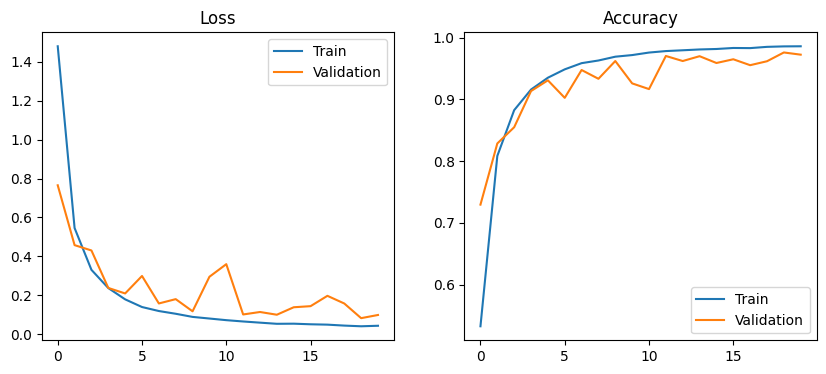

In [25]:
# Courbes loss et accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train')
plt.plot(val_accs, label='Validation')
plt.title('Accuracy')
plt.legend()
plt.show()

Test Accuracy: 97.20%


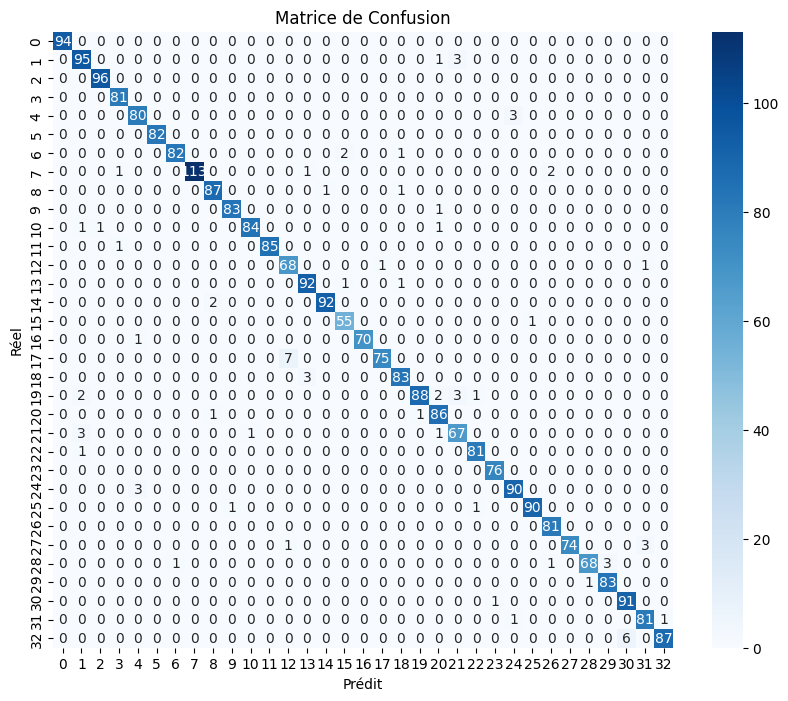

In [26]:
# Test final et matrice de confusion
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        outputs = model(x)
        preds = outputs.argmax(1)
        y_true += y.cpu().tolist()
        y_pred += preds.cpu().tolist()
acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {acc:.2%}")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

In [28]:
# test 
# Initialisation des listes
train_losses, val_losses, test_losses = [], [], []
train_accs, val_accs, test_accs = [], [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    test_loss, test_acc = evaluate(model, test_loader, criterion)  # Ajouter cette ligne

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

    train_accs.append(train_acc)
    val_accs.append(val_acc)
    test_accs.append(test_acc)

    print(f"Époch {epoch+1}: Train Acc = {train_acc:.2%}, Val Acc = {val_acc:.2%}, Test Acc = {test_acc:.2%}")


Époch 1: Train Acc = 97.97%, Val Acc = 96.34%, Test Acc = 96.10%
Époch 2: Train Acc = 97.94%, Val Acc = 95.46%, Test Acc = 95.21%
Époch 3: Train Acc = 98.17%, Val Acc = 96.59%, Test Acc = 96.52%
Époch 4: Train Acc = 98.37%, Val Acc = 95.85%, Test Acc = 96.45%
Époch 5: Train Acc = 98.39%, Val Acc = 94.85%, Test Acc = 95.64%
Époch 6: Train Acc = 98.57%, Val Acc = 95.81%, Test Acc = 95.74%
Époch 7: Train Acc = 98.25%, Val Acc = 96.03%, Test Acc = 96.95%
Époch 8: Train Acc = 98.41%, Val Acc = 95.92%, Test Acc = 96.49%
Époch 9: Train Acc = 98.73%, Val Acc = 95.95%, Test Acc = 95.99%
Époch 10: Train Acc = 98.90%, Val Acc = 96.91%, Test Acc = 96.74%
Époch 11: Train Acc = 98.75%, Val Acc = 96.98%, Test Acc = 97.55%
Époch 12: Train Acc = 98.78%, Val Acc = 95.81%, Test Acc = 96.63%
Époch 13: Train Acc = 98.69%, Val Acc = 96.20%, Test Acc = 96.45%
Époch 14: Train Acc = 98.74%, Val Acc = 97.23%, Test Acc = 97.13%
Époch 15: Train Acc = 98.73%, Val Acc = 96.66%, Test Acc = 96.88%
Époch 16: Train Acc

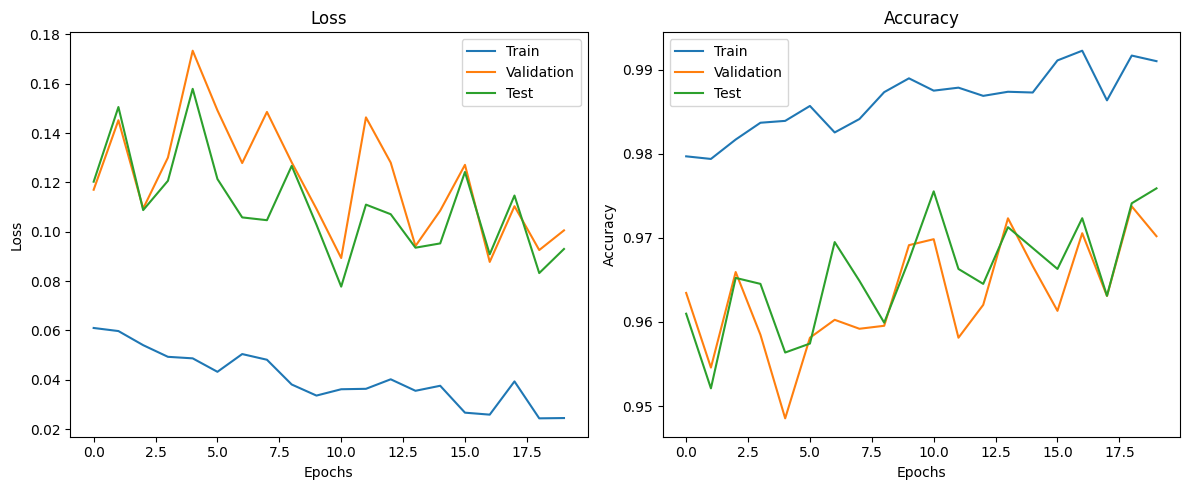

In [29]:
plt.figure(figsize=(12, 5))

# Courbe des pertes
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.plot(test_losses, label='Test')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe des précisions
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train')
plt.plot(val_accs, label='Validation')
plt.plot(test_accs, label='Test')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
